In [1]:
import pandas

housing = pandas.read_csv("C:\\Users\\91966\\OneDrive\\Desktop\\Instant Codes\\ML\\housing.csv")

In [2]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

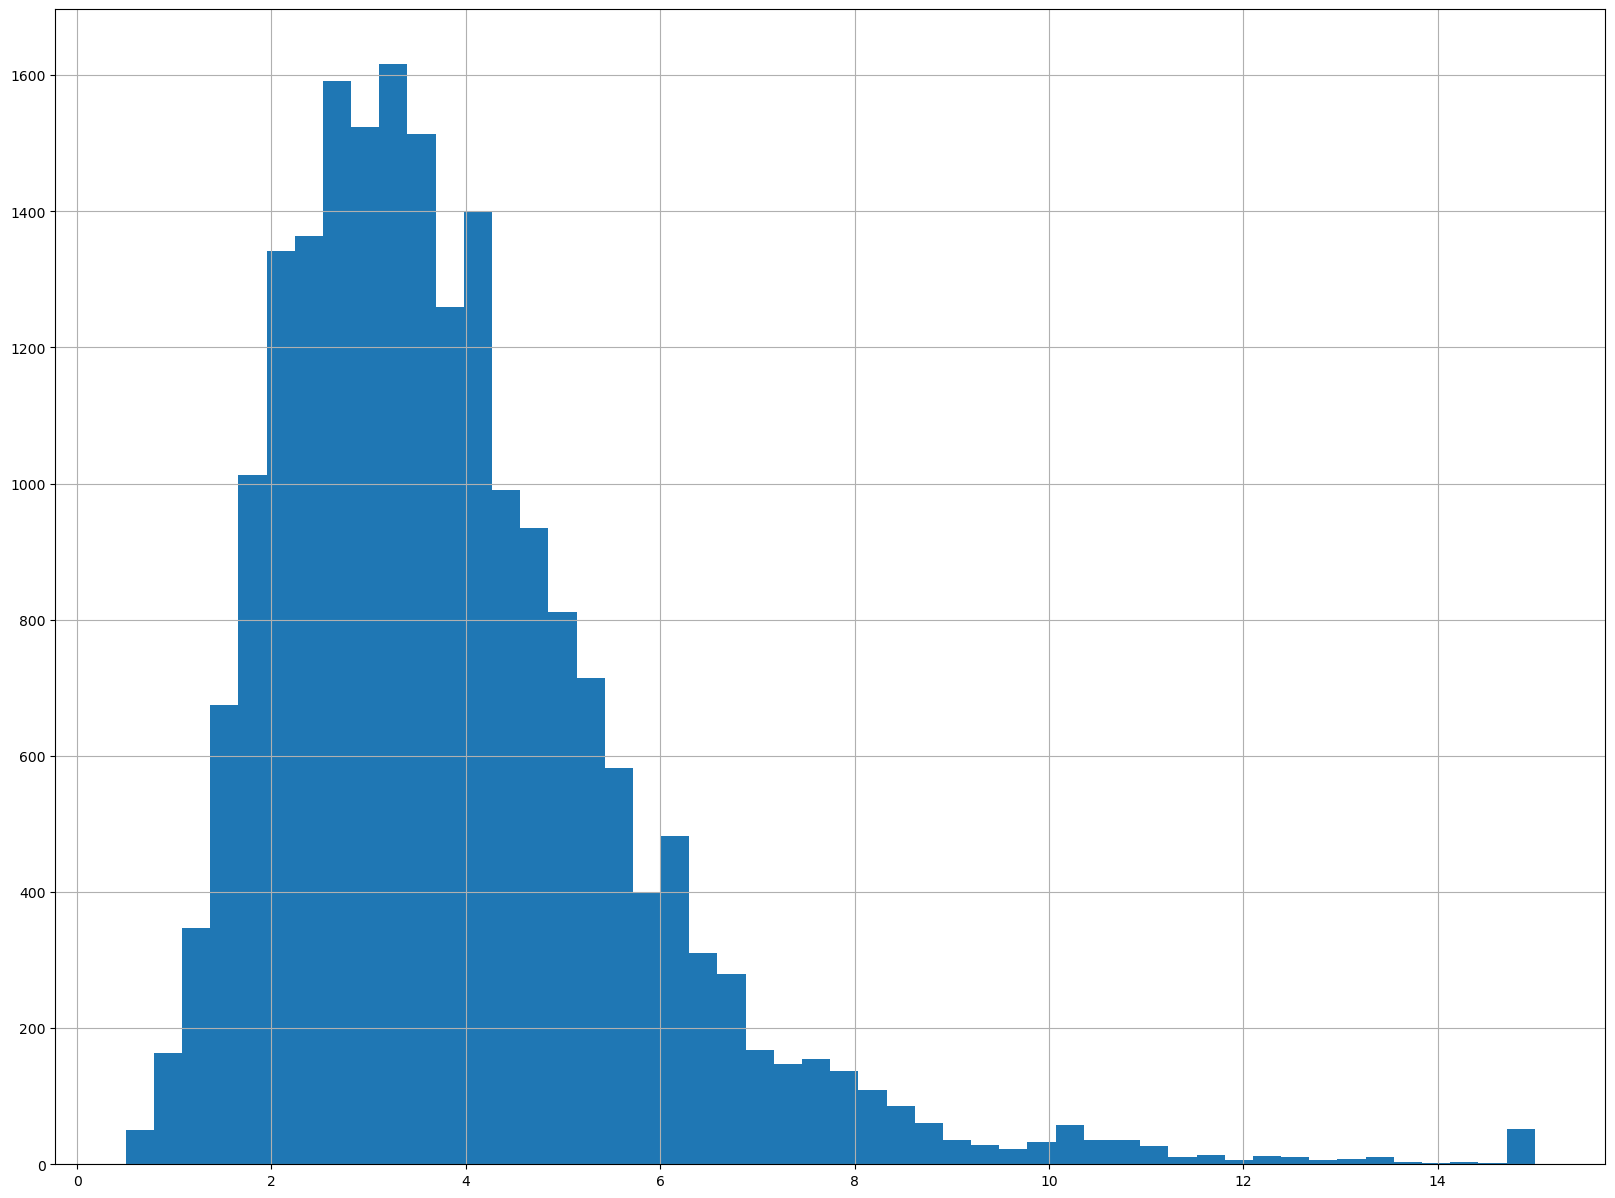

In [3]:
%matplotlib inline

import matplotlib.pyplot as plotter

housing["median_income"].hist(bins=50, figsize=(20,15))
plotter.show()

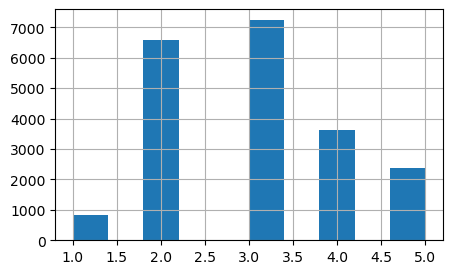

In [4]:
import numpy

housing["income_categ"] = pandas.cut(housing["median_income"],
                                    bins=[0, 1.5, 3.0, 4.5, 6.0, numpy.inf],    #1
                                    labels=[1,2,3,4,5])    #2

housing["income_categ"].hist(figsize=(5,3))
plotter.show()

In [5]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_indices, test_indices in split.split(housing, housing["income_categ"]):#1
    strat_train_set = housing.loc[train_indices]    #2
    strat_test_set = housing.loc[test_indices]

In [6]:
strat_train_set["income_categ"].value_counts() / len(strat_train_set)

income_categ
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: count, dtype: float64

In [7]:
for set_ in (strat_train_set, strat_test_set):    #1
    set_.drop("income_categ", axis=1, inplace=True)

In [8]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4128 entries, 5241 to 3965
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-null   float64
 1   latitude            4128 non-null   float64
 2   housing_median_age  4128 non-null   float64
 3   total_rooms         4128 non-null   float64
 4   total_bedrooms      4079 non-null   float64
 5   population          4128 non-null   float64
 6   households          4128 non-null   float64
 7   median_income       4128 non-null   float64
 8   median_house_value  4128 non-null   float64
 9   ocean_proximity     4128 non-null   object 
dtypes: float64(9), object(1)
memory usage: 354.8+ KB


In [9]:
housing2 = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

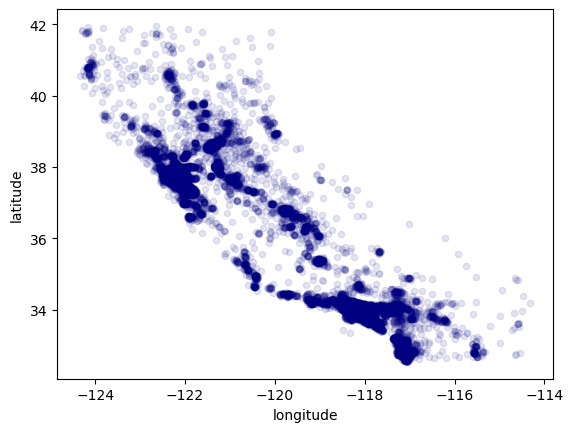

In [10]:
housing2.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1, color="navy")

In [11]:
oOppakx0_9 = 0

for i, row in housing2.iterrows():
    if (housing2.loc[i, "latitude"] >= 36 and housing2.loc[i, "latitude"] <= 38) and (housing2.loc[i, "longitude"] >= -120 and housing2.loc[i, "longitude"] <= -116):
        print(i)
    
    oOppakx0_9 += 1
    
    if oOppakx0_9==100:
        break

2167
2454
2007
2277
3182


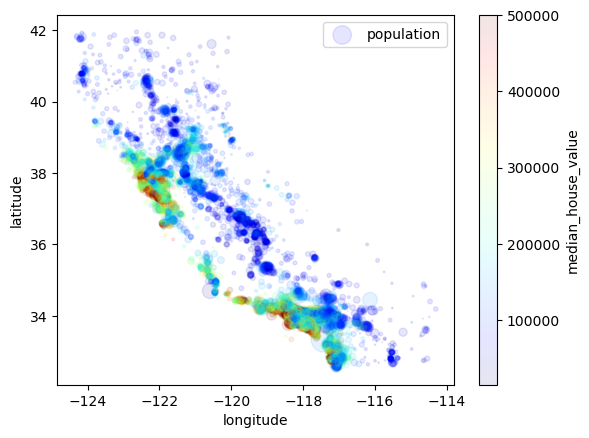

In [12]:
housing2.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1,
             label="population",    #1
              s=housing2["population"]/100,    #2
             c="median_house_value",    #3
              cmap=plotter.get_cmap("jet"),    #4
             colorbar=True)    #5

plotter.legend()

In [13]:
housing2.drop("ocean_proximity", axis=1, inplace=True)    #1
housing2.corr()["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

In [14]:
housing2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0


array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='housing_median_age', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>]],
      dtype=object)

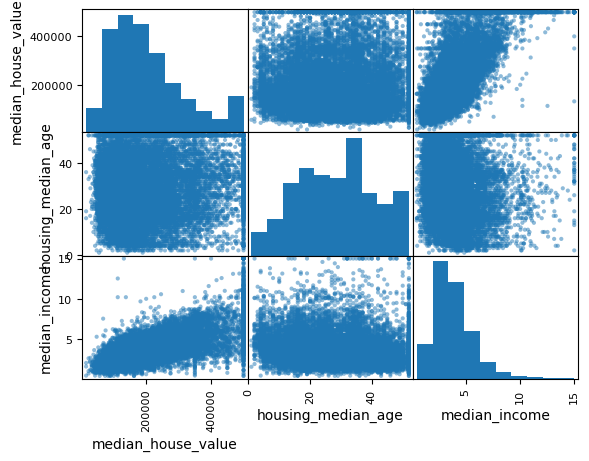

In [15]:
from pandas.plotting import scatter_matrix

scatter_matrix(
    housing2[["median_house_value", "housing_median_age", "median_income"]] #1
)

<Axes: xlabel='median_income', ylabel='median_house_value'>

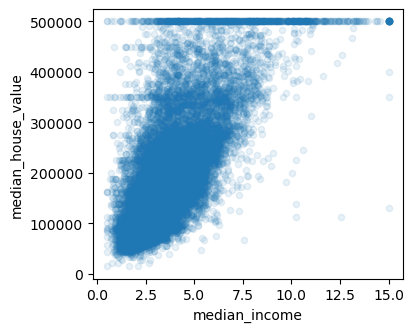

In [16]:
housing2.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1, figsize=(4,3.5))

In [17]:
housing["rooms_per_house"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_house"] = housing["total_bedrooms"]/housing["households"]
housing["people_per_house"] = housing["population"]/housing["households"]

housing.head(8)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_categ,rooms_per_house,bedrooms_per_house,people_per_house
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5,6.984127,1.023810,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5,6.238137,0.971880,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5,8.288136,1.073446,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4,5.817352,1.073059,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3,6.281853,1.081081,2.181467
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,3,4.761658,1.103627,2.139896
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,3,4.931907,0.951362,2.128405
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY,3,4.797527,1.061824,1.788253


In [18]:
housing_pred = strat_train_set.drop("median_house_value", axis=1)
housing_label = strat_train_set["median_house_value"].copy()

In [19]:
median_ = housing_pred["total_bedrooms"].median()
housing_pred["total_bedrooms"].fillna(median_, inplace=True)

In [20]:
housing_pred.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND


In [21]:
from sklearn.impute import SimpleImputer

housing_pred.drop("ocean_proximity", axis=1, inplace=True) #1

SimpleImputer(strategy="median").fit(housing_pred)

SimpleImputer(strategy='median')